# Letter Counter - Contador de letras


Pequeño notebook para contar la frecuencia de las letras en el castellano o cualquier idioma. Lo único necesario es que se le pase la lista de letras en un CSV.

Este documento es un Jupyter notebook. Puede utilizarse como documento o como herramienta ejecutable, permitiendo modificaciones de forma interactiva. 

Para saber màs sobre cómo ejecutarlo, puede revisar la documentación en [jupyter.org](https://jupyter.org/) y revisar el Makefile presente en la raíz de este repositorio.


# TODO - explicar un poco que tecnologia es esta

Using pandas and matplotlib.


## [EN] Configuration

This is the place to change settings, like data sources.

Read on for an explanation of each setting.

#### accent_dif

This flag, can  be used to treat characters with accent, differently from their equivalents without.

If the distiction is made; then `í` will be a different character than `i` and counted separately, having statistics for both.

If the distinction is **not** made; then `í` will be treated like `i` and counted together, having statistics only for `i`.

If the flag is set to False, the distiction won't be made.

#### wordlist files

These two variables identify the filename of each datasource.

The database of spanish words (Pérez, Alameda & Cuetos,2003) was provided as 2 separate files, one with words between 3 and 9 characters, and another one between 10 and 16. They are later on put together to gather the statistics.

[*]
Pérez, M. A., Alameda, J. R., y Cuetos, F. (2003). Frecuencia, longitud y vecindad ortográfica de las palabras de 3 a 16 letras del Diccionario de la Lengua Española (RAE, 1992). _Revista Electrónica de Metodología Aplicada (REMA)_ , _8_(2), 1–20.


---

## [ES] Configuración


Este es el lugar para cambiar la configuracion, como los acentos o la fuente de datos.

Siga leyendo para una explicacion de cada elemento

#### accent_dif

Esta opción puede usarse para tratar los caracteres con acento de forma diferente a sus equivalentes sin acento.

Si se hace la distinción, `í` será considerado un caracter distinto de `i` y contado de forma diferente, obteniendo estadísticas para ambos.

Si **no** se hace la distinción, `í` serà tratado como `i` y contado en conjunto, teniendo estadísticas solo para `i`.

Si el conmutador esta establecido a `False`, la distinción no será efectuada.

#### wordlist files

Estas dos variables identifican el nombre de archivo para cada fuente de datos.

La base de datos de palabras en castellano (Pérez, Alameda y Cuetos,2003) está provista de 2 archivos distintos, uno con las palabras etre 3 y 9 caracteres, y otro entre 10 y 16. Ambos serán unidos más adelante para recopilar las estadisticas.


[*] 
Pérez, M. A., Alameda, J. R., y Cuetos, F. (2003). Frecuencia, longitud y vecindad ortográfica de las palabras de 3 a 16 letras del Diccionario de la Lengua Española (RAE, 1992). _Revista Electrónica de Metodología Aplicada (REMA)_ , _8_(2), 1–20.



In [3]:

# Distinguish accent (True = i and í are 2 different letters; False = they are 2 letter i's)
accent_dif = False # False to ignore, as they won't be used for the exercises.

# Data sources
wordlist_fileSHORT = r'../data/Anexo I - palabras 3-9 letras.xls'
wordlist_fileLONG = r'../data/Anexo II - palabras 10-16 letras.xls'


### [EN] Loading Libraries

This part can be ignored. It's only relevant for developers.

Here the Python libraries used by the software are loaded. 

### [ES] Cargando Librerias

Esta parte puede ser omitida. Es solo relevante para desarrolladores.

Aquí se cargan las librerias de Python utilizadas por el software.

In [1]:
import unidecode
from collections import defaultdict

# Loading libraries
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


# Load jupyter notify
# See https://github.com/shoprunner/jupyter-notify
%load_ext jupyternotify



<IPython.core.display.Javascript object>

### [EN] Statistics

Initialising all the counters

---
### [ES] Estadísticas

Inicilizando los contadores

In [4]:
## Clear Up the statistics

## GLOBAL Variables
# total of words counted
word_sum = 0
# Freq of each letter
letter_frequency = defaultdict(lambda:0)
# Percentile of each letter's frequency
letter_freq_percent = defaultdict(lambda:0)
 

### [EN] Obtain list of usable words from 5 to 6 letters

On this step words between 5 and 6 characters are selected.

--- 

### [ES] Obtener la lista de palabras ente 5 y 6 letras

En este paso se seleccionan las palabras entre 5 y 6 caracteres.



In [ ]:
# SKIP Obtain the list of words from the original database
## SLOW Run carefully.

#load the sheets for 5 and 6 letters words as Pandas DataFrames
words5letters = pd.read_excel (wordlist_fileSHORT, sheet_name="5", verbose=True)
words6letters = pd.read_excel (wordlist_fileSHORT, sheet_name="6", verbose=True)

# Extract only the words and the lexyc frequency of words
w5l = pd.DataFrame(words5letters , columns=["PALABRA", "FRECUENC"])
w6l = pd.DataFrame(words6letters , columns=["PALABRA", "FRECUENC"])
w6l

##  <a name="counting"> </a>[EN] Counting the letters into the frequency database 

Building the statistics about how frequent each letter is.

All the code steps following until the next text cell are run in sequence.

---

## [ES] Contando las letras en la base de datos de frecuencias

Construyendo las estadisticas sobre la frecuencia de cada letra.

Los siguientes pasos hasta el siguiente bloque de texto se ejecutan en secuencia.

In [5]:
## Obtain the full database (old way)
## SLOW Run carefully.

#load the sheets for 5 and 6 letters words as Pandas DataFrames
all_words = pd.DataFrame(columns=["PALABRA","FRECUENC"])


for i in range(3,10): # range from 3 to 9, inclusive
    # wordlist_fileSHORT
    sheety = pd.read_excel (wordlist_fileSHORT, sheet_name=f"{i}", verbose=True)
    print(f"Words in {i} ", len(sheety))
    all_words = all_words.append( pd.DataFrame(sheety ,columns=["PALABRA","FRECUENC"]), ignore_index=True )
for i in range(10,17): # range from 10 to 16, inclusive
    # wordlist_fileLONG
    sheety = pd.read_excel (wordlist_fileLONG, sheet_name=f"{i}", verbose=True)
    print(f"Words in {i} ", len(sheety))
    all_words = all_words.append(pd.DataFrame(sheety ,columns=["PALABRA","FRECUENC"]), ignore_index=True )



all_words


Reading sheet 3
Words in 3  392
Reading sheet 4
Words in 4  1914
Reading sheet 5
Words in 5  5126
Reading sheet 6
Words in 6  9505
Reading sheet 7
Words in 7  13618
Reading sheet 8
Words in 8  15792
Reading sheet 9
Words in 9  15428
Reading sheet 10
Words in 10  12635
Reading sheet 11
Words in 11  8861
Reading sheet 12
Words in 12  5528
Reading sheet 13
Words in 13  3312
Reading sheet 14
Words in 14  1798
Reading sheet 15
Words in 15  1010
Reading sheet 16
Words in 16  464


,PALABRA,FRECUENC
0,aba,0
1,aca,0
2,acá,46
3,adó,0
4,afé,0
...,...,...
95378,ultramicroscopio,0
95379,ventriculografía,0
95380,vertiginosamente,2
95381,vicealmirantazgo,0


In [8]:
## Count the word into the stats Data structure

def is_vowel(letter):
    """ return if it's a vowel """
    return unidecode.unidecode(letter) in "aeiou"

def no_accent(letter):
    """ turn a letter into the no accent equivalent"""
    return unidecode.unidecode(letter) 

# validating the is_vowel function
assert is_vowel("a") == True
assert is_vowel("á") == True
assert is_vowel("v") == False

# Validating the no_accent function
assert no_accent("a") == "a"
assert no_accent("á") == "a"
assert no_accent("v") == "v"
    
def count_word(
        word, 
        letter_frequency = letter_frequency, 
        accent_dif = accent_dif
    ):
    """
    Given a word, update the global stats dictionary.
    It considers if you want to distinguish accents or not.
    
    Receives the word, the letter_frequency dictionary, 
    and the accent_dif setting.
    """
    global word_sum
    # don't count not numbers
    if type(word) == type(0.1):
        print(word)
        return None
    # Count the word to the total of words
    word_sum += 1
    # We might need to exclude accents, but not the ñ
    for letter in word:
        if not accent_dif: # we must NOT distinguish accents
            if is_vowel(letter):
                letter_frequency[no_accent(letter)] += 1
            else:
                letter_frequency[letter] += 1
        else:
            letter_frequency[letter] += 1


In [9]:
# Running it on all the words
## Building the Freq Table. Run Once.

def build_letter_freq_table():
    """
    Build the table with the total stats of letter frequency
    """
    for idx, word in enumerate(all_words.PALABRA):
        # make each letter into the stats dir.
        try:
            count_word(word)
        except TypeError as e:
            print(e)
            print(word)
            print(type(word))
            print("WTF")
    return None

build_letter_freq_table()
letter_frequency


defaultdict(<function __main__.<lambda>()>,
            {'a': 130353,
             'b': 15241,
             'c': 46648,
             'd': 34490,
             'o': 78651,
             'f': 9330,
             'e': 79179,
             'g': 14703,
             'h': 8224,
             'i': 70377,
             'j': 5190,
             'l': 39449,
             'm': 25658,
             'n': 50682,
             'ñ': 2253,
             'p': 19532,
             'r': 77056,
             's': 34923,
             't': 43949,
             'u': 26367,
             'v': 8209,
             'x': 1402,
             'y': 1252,
             'z': 6454,
             'k': 89,
             'q': 3280,
             'w': 24})

### <a name="dbresults"></a>[EN] Letter Frequency Database Results

In the cells above and below this one, are presented the statistics for each letter.

To learn about the creation process of this database, start reading [above](#counting).


-----------

### [ES] Resultados Base de datos de frecuencia de letras

En las celdas encima y debajo de la actual, se presentan las estadisticas para cada letra.

Para saber más sobre el proceso de creación de esta base de datos, comience a leer [arriba](#counting)

In [12]:
%%notify -m "freq table built"
# RUN: Check stats
print("letter_frequency",letter_frequency)
print("word_sum",word_sum)


letter_frequency defaultdict(<function <lambda> at 0x7fe42e9aa950>, {'a': 130353, 'b': 15241, 'c': 46648, 'd': 34490, 'o': 78651, 'f': 9330, 'e': 79179, 'g': 14703, 'h': 8224, 'i': 70377, 'j': 5190, 'l': 39449, 'm': 25658, 'n': 50682, 'ñ': 2253, 'p': 19532, 'r': 77056, 's': 34923, 't': 43949, 'u': 26367, 'v': 8209, 'x': 1402, 'y': 1252, 'z': 6454, 'k': 89, 'q': 3280, 'w': 24})
word_sum 95383


<IPython.core.display.Javascript object>

### <a name="relativefreq"></a>[EN] Calculate the Percentage of frequency for each letter

With the table of frequencies the percentage of frequency of each letter is calculated in relation to the others.

To calculate _Phi_ (The sum of the relative frequencies of each character in a word), the relative frequency of each character is needed.

The results are present on the output of the cell below.

----


### [ES] Calculando el porcentage de frecuencia de cada letra

Con la tabla de frecuencias se calcula el porcentage de frecuencia de cada palabra respecto a las demas.

Para calcular _Phi_ (La suma de frecuencias relativa de cada caracter en una palabra), necesitamos el % de frecuencias de cada caracter.

Los resultados se encuentran en el "output" de la celda inferior.

In [13]:
# tenemos la tabla de frec. Necesitamos phi. Hay que calcular, el phi de una palabla.
# para el phi, necesitamos, el % de frequencias

#suma todas las frec de todas las letras
tot_letters = 0 # all the counted letters
for k,v in letter_frequency.items():
    tot_letters += v
    
print("The sum of all the letters counted is:",tot_letters)

# Calculate the percentage of each letter's frequency

# letter_freq_percent = defaultdict(lambda:0) #reset it for testing
for letter,freq in letter_frequency.items():
    letter_freq_percent[letter] = (letter_frequency[letter] * 100 ) / tot_letters
    
print("The frequency percentage of each letter is: ",letter_freq_percent)

# Validate that the percentile is correct
check = 0
for l,f in letter_freq_percent.items():
    check+=f
print(round(check), " should be ", 100)
    

The sum of all the letters counted is: 832965
The frequency percentage of each letter is:  defaultdict(<function <lambda> at 0x7fe42e9c5b00>, {'a': 15.649276980425348, 'b': 1.8297287401031255, 'c': 5.60023530400437, 'd': 4.140630158530071, 'o': 9.442293493724225, 'f': 1.1200950820262556, 'e': 9.505681511227962, 'g': 1.7651401919648484, 'h': 0.9873163938460799, 'i': 8.448974446705444, 'j': 0.6230753993265024, 'l': 4.735973300198688, 'm': 3.08032150210393, 'n': 6.084529361977994, 'ñ': 0.2704795519619672, 'p': 2.34487643538444, 'r': 9.250808857515022, 's': 4.192613135005672, 't': 5.276212085741898, 'u': 3.165439124092849, 'v': 0.9855155978942692, 'x': 0.16831439496257344, 'y': 0.15030643544446645, 'z': 0.7748224715324173, 'k': 0.010684722647410156, 'q': 0.39377404812927314, 'w': 0.0028812735228971207})
100  should be  100


###  <a name="phi"></a> [EN] Calculate  Phi

take the frequency of each letter in a word, and add it up, to calculate the total "Phi" score.

----

### [ES] Calculando Phi

Tomando la frecuencia de cada letra en una palabra, y sumandola, para calcular la puntuación "Phi" total.


In [14]:

def calculate_phi(word):
    """ Calculate Phi
    Sum the frequency of each letter of the word"""
    phi = 0
    for letter in word:
        phi += letter_freq_percent[letter]
    return phi

assert round(calculate_phi("aa"),4) == round(31.2986,4)
assert calculate_phi("") == 0 
print( round(calculate_phi("busto"),4), round(23.9063,4 ))
print( round(calculate_phi("casa"),4), round(41.0914,4 ))


23.9063 23.9063
41.0914 41.0914


### <a name="rho"></a> [EN] Calculate Rho

Sum the total of strokes required for a word, adding up the strokes of each letter in the word.

----

### [ES] Calculando Rho

La suma total de trazos requeridos para una palabra, sumando todos los trazos de cada letra en la palabra.


In [15]:
# Stats of strokes per letter.
rasgos = {
        "a": 3,        "b": 4,        "c": 2,        "d": 3,        "e": 3,        "f": 4,
        "g": 4,        "h": 4,        "i": 3,        "j": 3,        "k": 5,        "l": 2,
        "m": 6,        "n": 4,        "o": 3,        "p": 4,        "q": 3,        "r": 3,
        "s": 3,        "t": 4,        "u": 4,        "v": 4,        "w": 6,        "x": 4,
        "y": 5,        "z": 5,        "ñ": 5
}

In [16]:
## Trying to calculate Stroke sum RHO
## Sum of all the strokes of each letter in a word

def get_rho(letter):
    if len(letter) > 1:
        print("ERROR: ", letter)
        raise Exception("Word instead of letter")
    return rasgos[letter]

def calculate_rho(word=None):
    """ Calculate the Rho value of a word.
    Rho is the sum of the strokes of the each letter in a word.
    """
    if word is None:
        return 0
    rho = 0
    for letter in word:
        if not accent_dif: # we must NOT distinguish accents
            if is_vowel(letter):
                rho += get_rho(no_accent(letter))
            else:
                rho += get_rho(letter)
        else:
            rho += get_rho(letter)
    return rho

assert calculate_rho("aa") == 6
assert calculate_rho("")==0
assert calculate_rho("peluca")== 18
assert calculate_rho("pelúca")== 18
assert calculate_rho()==0

## <a name="adding"></a> [EN] Adding the data together

Now that Phi is calculated (total relative frequency of letters) and Rho (total strokes to write the word),
merging it into a big table to ease creating experiments.

The output of the following cell shows a sample of such a table.

----

## [ES] Juntando los datos

Ahora que Phi ha sido calculado (frecuencia relativa total de letras) y Rho (total de rasgos de una palabra), unirla en una gran tabla facilitara la tarea de creación de experimentos.

La salida de la celda siguiente presenta una muestra de dicha tabla.


In [17]:
## Create DATA
## Creating a new column with the Rho of each word
print(type(all_words))

def compute_rho(df):
    return [calculate_rho(x) for x in df.PALABRA]

data = all_words.assign(RHO=lambda x: compute_rho(x))

## Creating a new column with the Phi of each word
print(type(all_words))

def compute_phi(df):
    return [calculate_phi(x) for x in df.PALABRA]

data = data.assign(PHI=lambda x: compute_phi(x))

## Creating a new column with the length
print(type(all_words))

def compute_len(df):
    return [len(x) for x in df.PALABRA]

data = data.assign(LENGTH=lambda x: compute_len(x))

data

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,PALABRA,FRECUENC,RHO,PHI,LENGTH
0,aba,0,10,33.128283,3
1,aca,0,8,36.898789,3
2,acá,46,8,21.249512,3
3,adó,0,9,19.789907,3
4,afé,0,10,16.769372,3
...,...,...,...,...,...
95378,ultramicroscopio,0,51,113.371630,16
95379,ventriculografía,0,52,105.930261,16
95380,vertiginosamente,2,57,112.502446,16
95381,vicealmirantazgo,0,55,120.347314,16


## How the data looks like

This is a brief summary of the stats for all the words in the complete original database

Words with higher frequency than 4000, are mostly nexus like "el","de", etc.

In [29]:
data = data.loc[data["FRECUENC"].apply(lambda x: filter_freq(x,20,90))]
data.describe()

,RHO,PHI,LENGTH
count,3323.000000,3323.000000,3323.000000
mean,24.672585,55.039647,7.559133
std,7.790564,18.045137,2.299067
min,7.000000,12.259339,3.000000
25%,19.000000,41.750854,6.000000
50%,24.000000,53.648833,7.000000
75%,29.000000,66.620026,9.000000
max,60.000000,128.477907,16.000000


### Phi over Frequency

Each word is a dot, showing the relationship between Phi (Y axis) and total frequency (X axis)

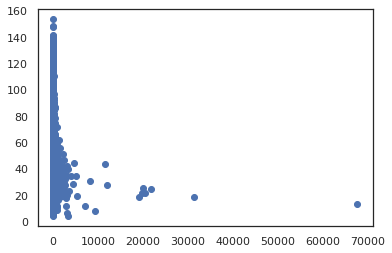

In [129]:
plt.scatter(data.FRECUENC,data.PHI) # (x=Freq,y=phi)

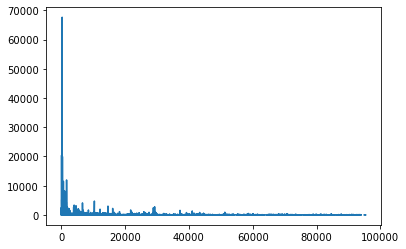

In [22]:
data.FRECUENC.plot()

### Phi and Rho Plotted

This shows the distribution of Phi and Rho, over the ~95k words.

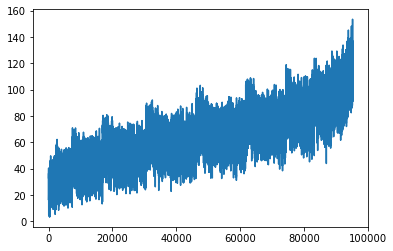

In [18]:
data.PHI.plot()


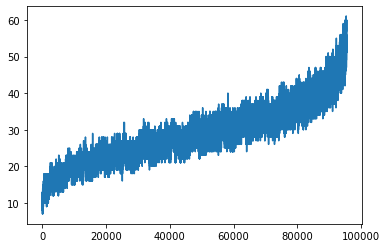

In [23]:
data.RHO.plot()